In [36]:
import pandas as pd
import numpy as np
import seaborn as sbn
import re
from matplotlib import pyplot
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('./assets/cleaned_data.csv')

# Years of Experience Versus Pay 
## Interesting how it levels out more or less after a decade

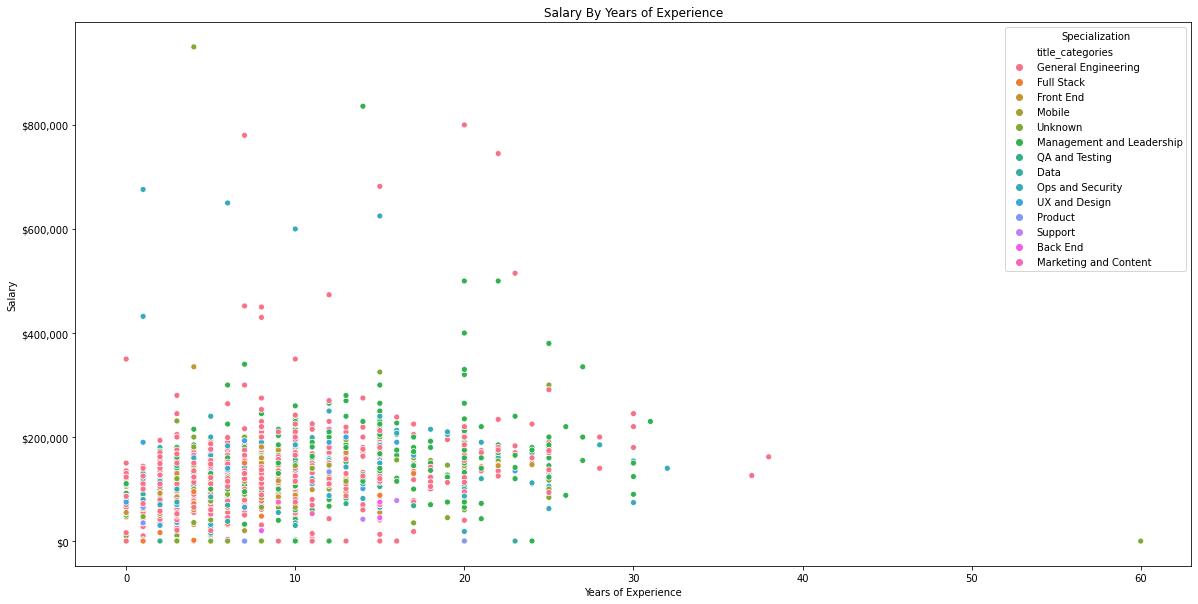

In [40]:
fig, ax = pyplot.subplots(figsize=(20,10))

plot = sbn.scatterplot(data=df, x='experience', y='salary', ax=ax, hue='title_categories')
plot.set(xlabel='Years of Experience', ylabel='Salary', yticklabels=range(0, 1000000, 50000), title='Salary By Years of Experience')
fig.show()
ax.legend(title='Specialization')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

fig.savefig('./graphs/experience-scatter.png')

# Distribution of Pay

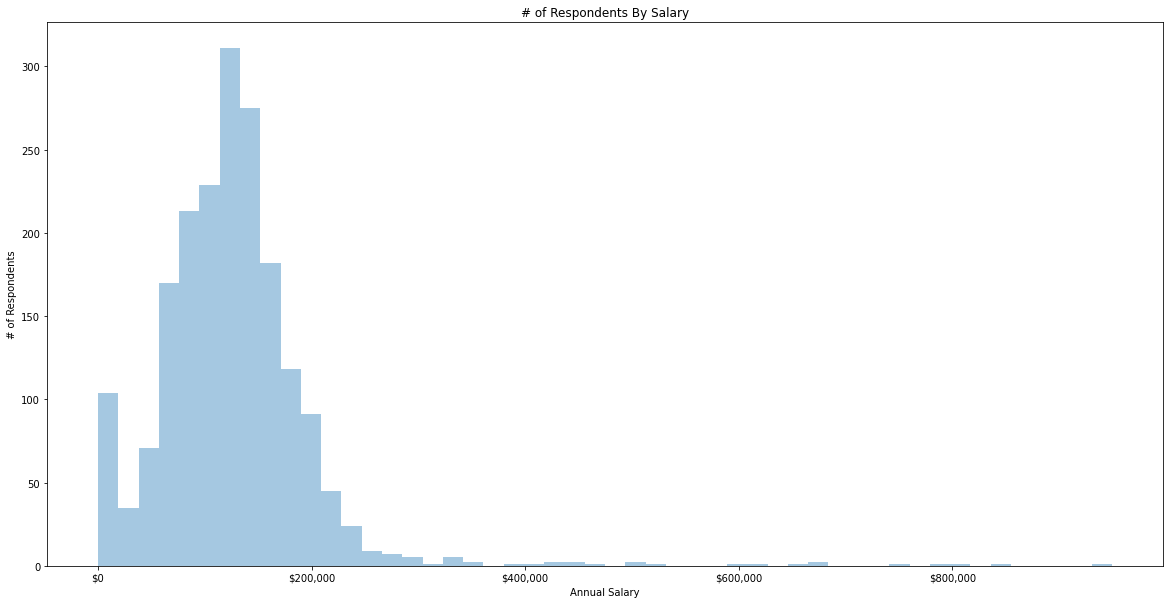

In [41]:

fig, ax = pyplot.subplots(figsize=(20,10))

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

plot = sbn.distplot(df['salary'], ax=ax, kde=False)
plot.set(xlabel='Annual Salary', ylabel='# of Respondents', title='# of Respondents By Salary')

fig.show()
fig.savefig('./graphs/pay-histogram.png')

# Pay in Different Cities

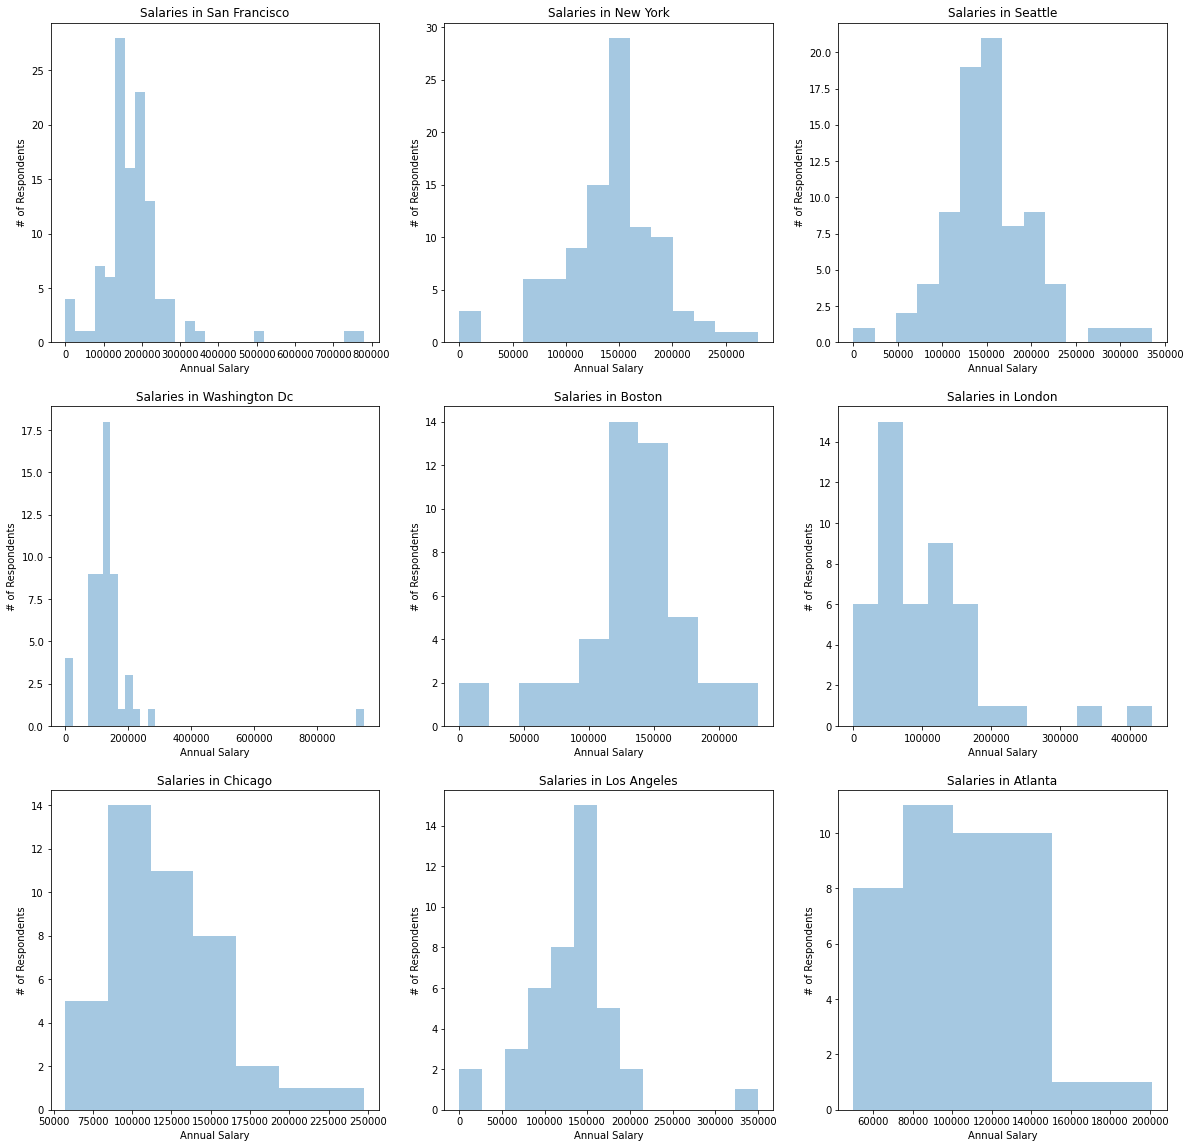

In [42]:
top_cities = df['location'].value_counts()[:9].index

fig, axs = pyplot.subplots(3, 3, figsize=(20,20))
for i, figure in enumerate(axs.flat):
    plot = sbn.distplot(df[df['location'] == top_cities[i]]['salary'], ax=figure, kde=False)
    plot.set(title=f'Salaries in {top_cities[i].title()}', xlabel='Annual Salary', ylabel='# of Respondents')
fig.savefig('./graphs/cities-histogram.png')

# Pay Distribution in Different Specialties

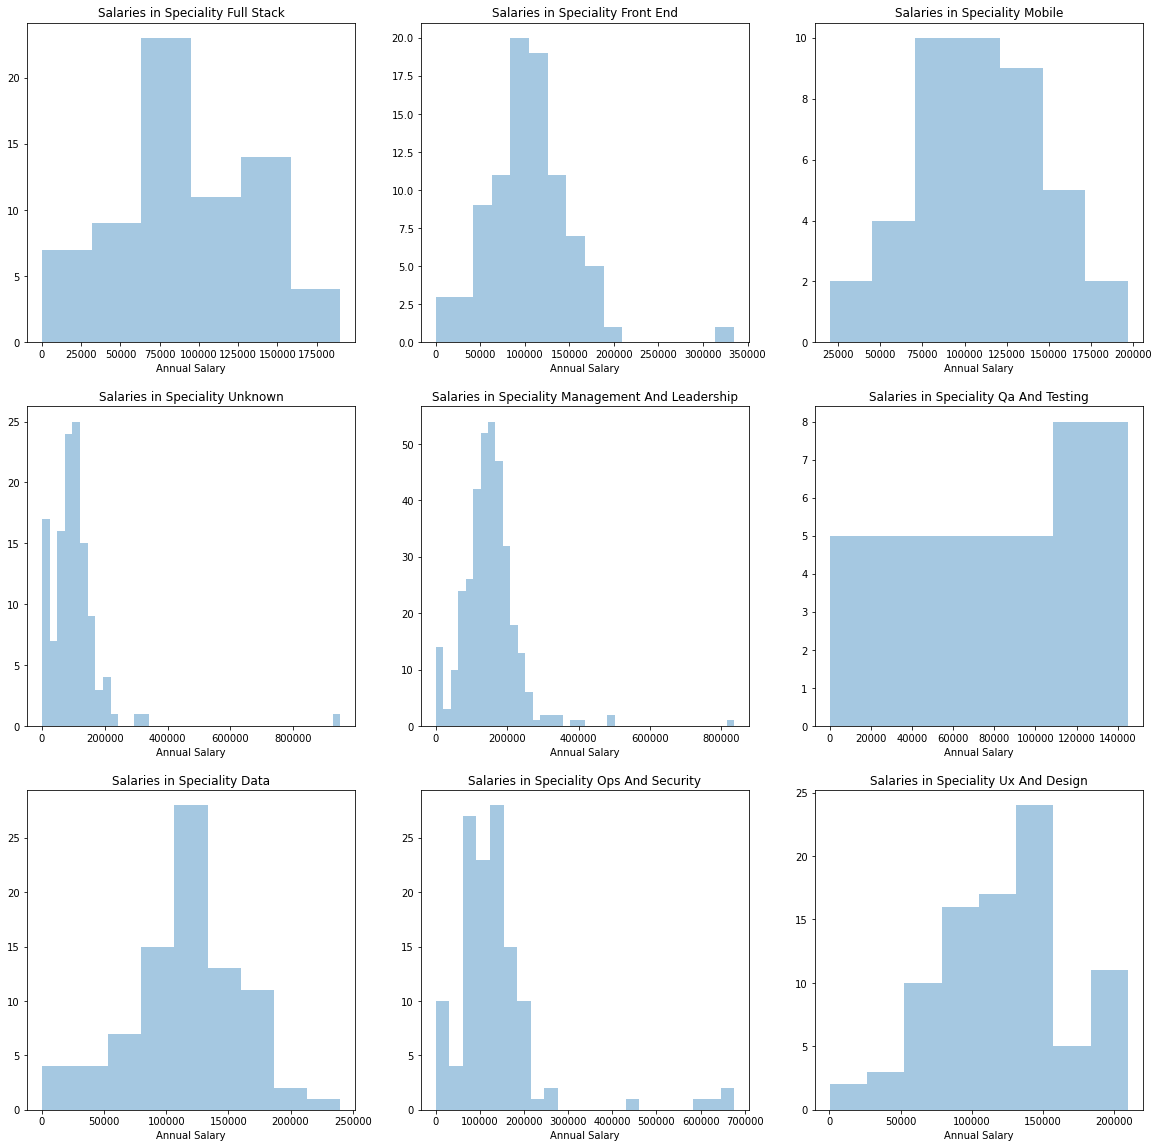

In [43]:
title_categories = df['title_categories'].unique()[1:]

fig, axs = pyplot.subplots(3, 3, figsize=(20,20))
for i, figure in enumerate(axs.flat):
    plot = sbn.distplot(df[df['title_categories'] == title_categories[i]]['salary'], ax=figure, kde=False)
    plot.set(title=f'Salaries in Speciality {title_categories[i].title()}', xlabel='Annual Salary')
fig.savefig('./graphs/specialties-histogram.png')

# Respondents from Different Specialties

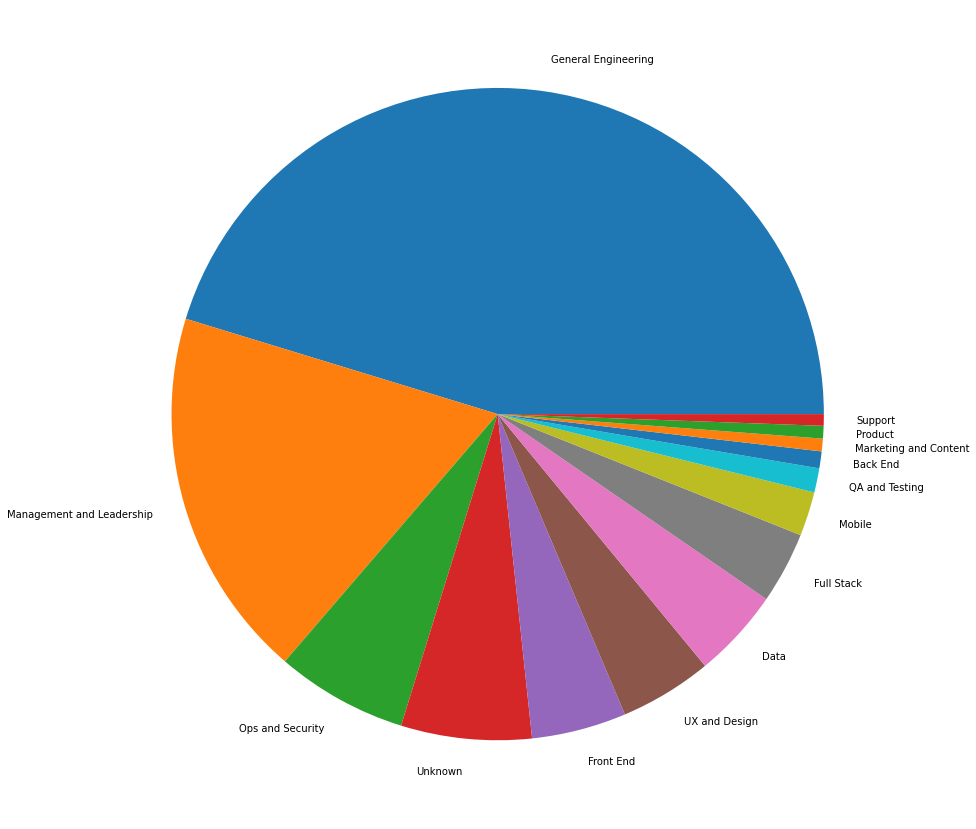

In [44]:
counts = df['title_categories'].value_counts()
fig, axs = pyplot.subplots(figsize=(15,15))

pyplot.pie(counts, labels=counts.keys())
fig.savefig('./graphs/specialty-pie.png')


# Average Salary By Org Size

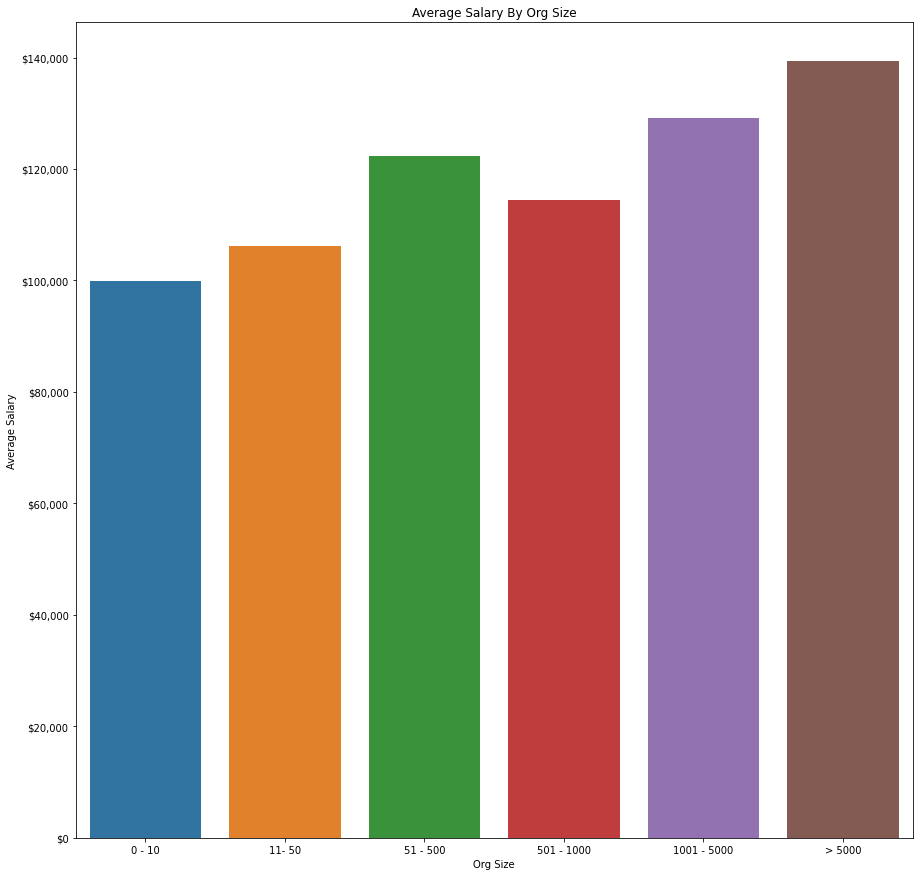

In [89]:
org_salaries = df.groupby('Org Size').mean()['salary']
org_salaries = pd.DataFrame(org_salaries).reset_index()

fig, axs = pyplot.subplots(figsize=(15,15))

plot = sbn.barplot(data=org_salaries, x='Org Size', y='salary', order=['0 - 10', '11- 50', '51 - 500', '501 - 1000', '1001 - 5000', '> 5000'])
plot.set(title=f'Average Salary By Org Size', xlabel='Org Size', ylabel='Average Salary')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axs.yaxis.set_major_formatter(tick) 

fig.savefig('./graphs/org-size-bar.png')




# Remote By Org Size - Not Surprising, Big Orgs Are Slow to Adopt Remote, Small Ones Are Not

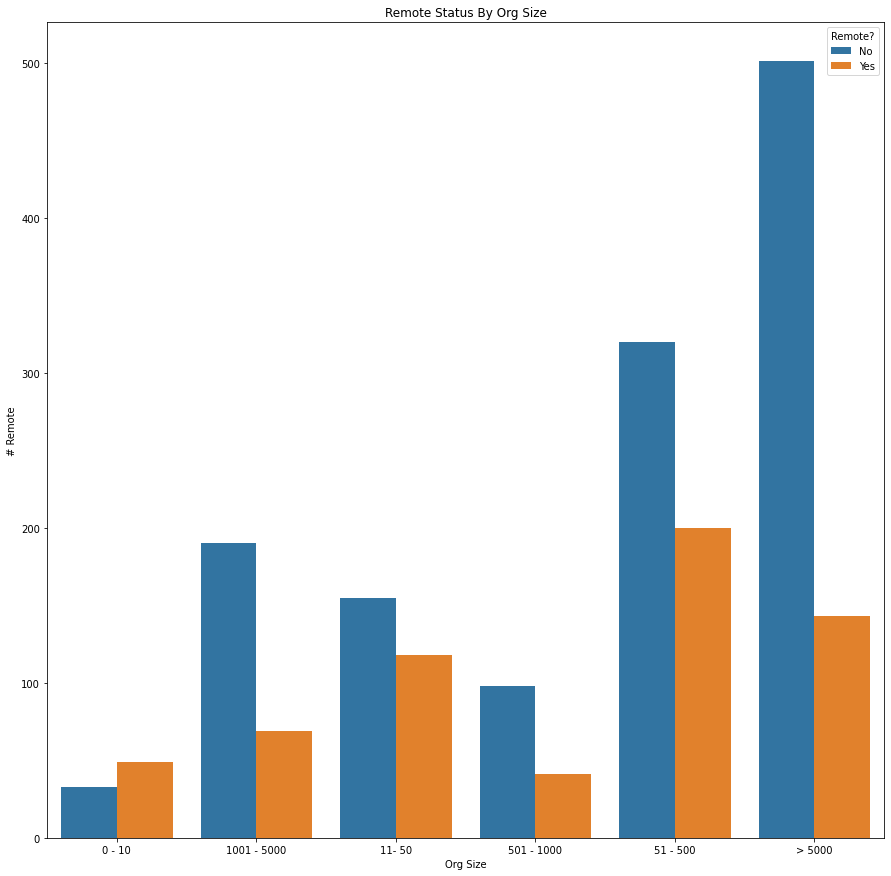

In [91]:
remote = df.groupby(['Org Size', 'Remote?']).count()['salary']
remote = pd.DataFrame(remote).reset_index()

fig, axs = pyplot.subplots(figsize=(15,15))

plot = sbn.barplot(data=remote, x='Org Size', y='salary', hue='Remote?')
plot.set(title=f'Remote Status By Org Size', xlabel='Org Size', ylabel='# Remote')

fig.savefig('./graphs/org-size-remote-bar.png')


